In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import time

In [2]:
A = np.identity(1000)*2.
B = (np.random.rand(1000,1000)-0.5)*100 + np.identity(1000)*1000
C = (np.random.rand(1000,1000)-0.5)*100 + np.identity(1000)*35
D = np.triu(B) + np.transpose(np.triu(B,k=1))
E = np.dot(np.triu(B),np.transpose(np.triu(B)))

$$E = LL^*$$

In [3]:
print(scipy.linalg.inv(D))
start=time.time()
print(scipy.linalg.inv(E))
end = time.time()
print(end-start)

[[-1.49930793e-04 -2.38747650e-05 -1.98564329e-03 ... -4.26713590e-04
   4.20022653e-04  2.72251299e-03]
 [-2.38747650e-05  2.05680880e-04 -3.48019921e-04 ... -1.21086064e-04
  -1.95721665e-04  8.57851136e-04]
 [-1.98564329e-03 -3.48019921e-04 -2.85000667e-03 ... -6.97509649e-04
   8.58104228e-05  6.23389106e-03]
 ...
 [-4.26713590e-04 -1.21086064e-04 -6.97509649e-04 ...  3.88578961e-04
  -2.86605349e-04  1.36674988e-03]
 [ 4.20022653e-04 -1.95721665e-04  8.58104228e-05 ... -2.86605349e-04
   1.65919145e-03  9.64275906e-05]
 [ 2.72251299e-03  8.57851136e-04  6.23389106e-03 ...  1.36674988e-03
   9.64275906e-05 -6.65404805e-03]]
[[ 1.02314074e-06 -4.02353592e-08  4.81189394e-09 ... -5.80970037e-08
  -3.92961288e-08 -2.13877088e-08]
 [-4.02353592e-08  9.15624374e-07 -1.45390453e-08 ... -8.17873000e-08
  -1.47778998e-08  5.61115898e-10]
 [ 4.81189394e-09 -1.45390453e-08  1.05626562e-06 ...  3.61182106e-08
   2.44259975e-08  1.52142829e-08]
 ...
 [-5.80970037e-08 -8.17873000e-08  3.6118210

In [4]:
start = time.time()
invA_np = np.linalg.inv(A)
end = time.time()
print(end-start)
print(invA_np)

0.09808897972106934
[[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]


In [5]:
start = time.time()
invA_sp = scipy.linalg.inv(A)
end = time.time()
print(end-start)
print(invA_sp)

0.07489728927612305
[[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]


In [6]:
def invert_chol(A):
    B, info = scipy.linalg.lapack.dpotrf(A)
    if info != 0: 
        print('Matrix is singular!')
        return
    inv, info = scipy.linalg.lapack.dpotri(B)
    if info != 0 :
        print('Inversion failed')
        return 
    inv[:,:] = inv[:,:] + np.transpose(np.triu(inv[:,:],1))
    return inv
def invert_LU(A):
    B, pivot, info = scipy.linalg.lapack.dgetrf(A)
    if info != 0: 
        print('Matrix is singular!')
        return
    inv, info = scipy.linalg.lapack.dgetri(B,pivot)
    if info != 0 :
        print('Inversion failed')
        return 
    return inv

https://en.wikipedia.org/wiki/LU_decomposition

In [7]:
start = time.time()
invB_CH = invert_chol(B)
end = time.time()
print(end-start)
print(invB_CH)

start = time.time()
invA_CH = invert_chol(A)
end = time.time()
print(end-start)
print(invA_CH)

start = time.time()
invD_CH = invert_chol(D)
end = time.time()
print(end-start)
print(invD_CH)

start = time.time()
invE_CH = invert_chol(E)
end = time.time()
print(end-start)
print(invE_CH)

Matrix is singular!
0.013985157012939453
None
0.06381893157958984
[[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]
Matrix is singular!
0.01036214828491211
None
0.04888296127319336
[[ 1.02314074e-06 -4.02353592e-08  4.81189394e-09 ... -5.80970037e-08
  -3.92961288e-08 -2.13877088e-08]
 [-4.02353592e-08  9.15624374e-07 -1.45390453e-08 ... -8.17873000e-08
  -1.47778998e-08  5.61115898e-10]
 [ 4.81189394e-09 -1.45390453e-08  1.05626562e-06 ...  3.61182106e-08
   2.44259975e-08  1.52142829e-08]
 ...
 [-5.80970037e-08 -8.17873000e-08  3.61182106e-08 ...  2.35242125e-06
   5.13395222e-08 -1.31275587e-07]
 [-3.92961288e-08 -1.47778998e-08  2.44259975e-08 ...  5.13395222e-08
   2.20376985e-06  4.17953575e-08]
 [-2.13877088e-08  5.61115898e-10  1.52142829e-08 ... -1.31275587e-07
   4.17953575e-08  2.45250003e-06]]


In [8]:
start = time.time()
invB_LU = invert_LU(B)
end = time.time()
print(end-start)
print(invB_LU)

start = time.time()
invA_LU = invert_LU(A)
end = time.time()
print(end-start)
print(invA_LU)

start = time.time()
invD_LU = invert_LU(D)
end = time.time()
print(end-start)
print(invD_LU)

start = time.time()
invE_LU = invert_LU(E)
end = time.time()
print(end-start)
print(invE_LU)

0.13430094718933105
[[ 8.60992407e-04 -1.34601446e-04  8.33572960e-05 ... -2.64323579e-05
  -1.39064960e-05  6.85820903e-05]
 [ 2.74237325e-05  8.09339918e-04  5.32535573e-05 ... -1.28598623e-05
  -9.22135645e-05 -5.44222132e-05]
 [-5.62509822e-05  3.15433785e-05  9.99882724e-04 ...  1.93637498e-05
  -7.20111679e-06  2.24260965e-05]
 ...
 [-6.23163717e-05 -2.80305798e-05 -3.05199956e-05 ...  1.00562424e-03
  -3.01968164e-05 -3.29542850e-05]
 [ 5.38411076e-05  1.06680065e-04 -1.01565685e-04 ... -1.34414991e-05
   9.14032642e-04 -3.71910296e-05]
 [-5.05724370e-05 -1.14379195e-04 -1.20559286e-04 ...  3.91353492e-06
   3.65213590e-05  1.20448084e-03]]
0.1662609577178955
[[ 0.5  0.  -0.  ...  0.   0.   0. ]
 [ 0.   0.5 -0.  ...  0.   0.   0. ]
 [ 0.   0.   0.5 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  0.5  0.  -0. ]
 [ 0.   0.   0.  ...  0.   0.5 -0. ]
 [ 0.   0.   0.  ...  0.   0.   0.5]]
0.1056828498840332
[[-1.49930793e-04 -2.38747650e-05 -1.98564329e-03 ... -4.26713590e-04
   4.200

In [9]:
def outer(A,B):
    return scipy.linalg.blas.dger(1.,A,B)
def MatrixMul(A,B):
    try:
        scipy.linalg.blas
    except AttributeError:
        return np.dot(A, B)
    
    if not A.flags['F_CONTIGUOUS']:
        AA = A.T
        transA = True
    else:
        AA = A
        transA = False
        
    if not B.flags['F_CONTIGUOUS']:
        BB = B.T
        transB = True
    else:
        BB = B
        transB = False
        
    return scipy.linalg.blas.dgemm(alpha=1., a=AA, b=BB, trans_a=transA, trans_b=transB)

$$
M = \vec{v}^T\times \vec{w}
$$

In [12]:
B = (np.random.rand(10000,10000)-0.5)*100 
C = (np.random.rand(10000,10000)-0.5)*100 

In [115]:
start = time.time()
prod = np.dot(B,C)
end = time.time()
print(end-start)

44.77037000656128


In [116]:
start = time.time()
prod = MatrixMul(B,C)
end = time.time()
print(end-start)

44.858494997024536


In [14]:
test = (np.random.rand(100,100)-0.5)*100 
test.flags['F_CONTIGUOUS']

False

In [17]:
test = np.asfortranarray(test)
test.flags['F_CONTIGUOUS']
test2=np.array([[1,2,3,4,5],[1,2,5,6,7]],order='F')
test2.flags['F_CONTIGUOUS']

True

In [11]:
vec1 = (np.random.rand(1000)-0.5)*100
vec2 = (np.random.rand(1000)-0.5)*100

In [12]:
start = time.time()
prod = np.outer(vec1,vec2)
end = time.time()
print(end-start)

0.001940011978149414


In [13]:
start = time.time()
prod = outer(vec1,vec2)
end = time.time()
print(end-start)

0.00982809066772461


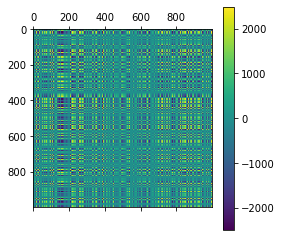

In [14]:
plt.matshow(prod)
plt.colorbar()

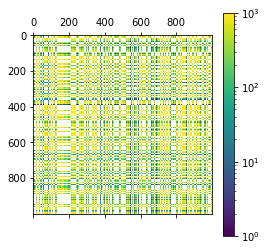

In [16]:
from matplotlib.colors import LogNorm
plt.matshow(prod,norm=LogNorm(vmin=10e-1,vmax=1000))
plt.colorbar()

In [25]:
array1 = np.linspace(1,100,100)
array1

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [26]:
array2 = array1[50:]
array2

array([ 51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
        62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
        73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
        95.,  96.,  97.,  98.,  99., 100.])

In [30]:
array2 = np.zeros(len(array1[50:]))
array2[:] = array1[50:]

1) B = A : This binds a new name B to the existing object already named A. Afterwards they refer to the same object, so if you modify one in place, you'll see the change through the other one too.

2) B[:]=A[:] : This copies the values from A into an existing array B. The two arrays must have the same shape for this to work. B[:] = A[:] does the same thing (but B = A[:] would do something more like 1).

3) B = numpy.copy(A) : This is almost the same as 2, but it creates a new array, rather than reusing the B array. If there were no other references to the previous B value, the end result would be the same as 2, but it will use more memory temporarily during the copy.

In [33]:
a = np.array([1,2,3])
b = a
print(b)
a[:] = a[:]+2
print(b)

[1 2 3]
[3 4 5]
